# Customer Segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('PBL 5 recommendation data.csv', encoding = 'latin_1')

C:\Users\Kimberly\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (20,33,73,106,158) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [4]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [5]:
df.tail()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,Plastic Rim,NaN,NaN,NaN,PF06157,3.0,NaN
4190,3732,Kennithe,Tecora,NaN,1463412756,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF08485,3.0,NaN
4191,3733,Tinna,Randall,NaN,1463413245,NaN,NaN,NaN,NaN,NaN,...,NaN,21AH Batteries,NaN,NaN,NaN,NaN,NaN,PM36,3.0,NaN
4192,3735,HALIMAH,SHAHID,NaN,1463416687,NaN,1.0,NaN,NaN,NaN,...,5.0,NaN,NaN,Aluminum,NaN,NaN,NaN,PF04829,3.0,NaN
4193,3736,Michael,Kiernan,NaN,1463418049,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,Large,NaN,NaN,NaN,NaN,PF03816,3.0,NaN


In [6]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

Customers.id                         0
Customers.fname                      0
Customers.lname                      0
Customers.company                 3467
Customers.create_date                0
Customers.status                  4093
Customers.mailing                 2080
Customers.reminders               4194
Customers.tax_exempt              4189
Customers.account_id              4191
Customers.sales_rep               4194
Customers.rewards                 4194
Customers.profile_id              4194
Customers.last_modified              0
Customers.customer_type            423
Orders.id                            0
Orders.customer_id                   0
Orders.fname                         0
Orders.lname                         0
Orders.company                    3466
Orders.order_number                  0
Orders.reorder_id                 4112
Orders.external_source            3829
Orders.external_id                4189
Orders.currency                      0
Orders.sales_rep         

In [7]:
customer_df = df.iloc[:,:15]
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 15 columns):
Customers.id               4194 non-null int64
Customers.fname            4194 non-null object
Customers.lname            4194 non-null object
Customers.company          727 non-null object
Customers.create_date      4194 non-null int64
Customers.status           101 non-null float64
Customers.mailing          2114 non-null float64
Customers.reminders        0 non-null float64
Customers.tax_exempt       5 non-null float64
Customers.account_id       3 non-null float64
Customers.sales_rep        0 non-null float64
Customers.rewards          0 non-null float64
Customers.profile_id       0 non-null float64
Customers.last_modified    4194 non-null int64
Customers.customer_type    3771 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 491.6+ KB


In [8]:
order_df = df.iloc[:, 15:83]
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 68 columns):
Orders.id                        4194 non-null int64
Orders.customer_id               4194 non-null int64
Orders.fname                     4194 non-null object
Orders.lname                     4194 non-null object
Orders.company                   728 non-null object
Orders.order_number              4194 non-null object
Orders.reorder_id                82 non-null float64
Orders.external_source           365 non-null object
Orders.external_id               5 non-null float64
Orders.currency                  4194 non-null object
Orders.sales_rep                 0 non-null float64
Orders.subtotal                  4194 non-null float64
Orders.tax                       3737 non-null float64
Orders.shipping                  3999 non-null float64
Orders.coupon_id                 882 non-null float64
Orders.coupon_amount             882 non-null float64
Orders.gift_id                   0 

In [9]:
product_df = df.iloc[:, 83:181]
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 98 columns):
Products.id                       4037 non-null float64
Products.status                   4037 non-null float64
Products.product_type             0 non-null float64
Products.template                 3973 non-null object
Products.vendor                   4037 non-null float64
Products.import_id                4037 non-null float64
Products.name                     4037 non-null object
Products.display_name             3662 non-null object
Products.menu_name                0 non-null float64
Products.list_price               4017 non-null float64
Products.price                    4036 non-null float64
Products.sale_price               1160 non-null float64
Products.cost                     4037 non-null float64
Products.flags                    2987 non-null float64
Products.left_flag                1239 non-null float64
Products.right_flag               0 non-null float64
Products.

In [10]:
import sqlite3
conn = sqlite3.connect('customer_seg.db')
#customer_df.to_sql('customer', conn)
#product_df.to_sql('product', conn)
order_df.to_sql('orders', conn)

ValueError: Table 'orders' already exists.

In [11]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 15)
customer_query = "SELECT * FROM customer"
customer_data = pd.read_sql(customer_query,conn)
customer_data.head()

,index,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,...,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type
0,0,797,Christy,Dill,Company0,1426018724,NaN,...,NaN,NaN,None,None,None,1437764306,0.0
1,1,3,John,Smith,Company1,1386089139,NaN,...,NaN,NaN,None,None,None,1437764354,0.0
2,2,3,John,Smith,Company1,1386089139,NaN,...,NaN,NaN,None,None,None,1437764354,0.0
3,3,4,James,Anderson,None,1386780263,NaN,...,NaN,NaN,None,None,None,1437762646,0.0
4,4,5,Abraham,Pollak,Company3,1386861599,0.0,...,NaN,NaN,None,None,None,1437764316,0.0


In [12]:
product_query = "SELECT * FROM product"
product_data = pd.read_sql(product_query,conn)
product_data.head()

,index,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,...,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,0,2310.0,0.0,None,sub-product-detail.html,1.0,3.0,...,None,None,None,None,PF61071,0.0,None
1,1,177.0,1.0,None,sub-product-detail.html,1.0,3.0,...,None,None,None,None,PF02132,NaN,None
2,2,1.0,0.0,None,sub-product-detail.html,1.0,3.0,...,Nitrile,None,None,None,PF00342,0.0,None
3,3,983.0,0.0,None,sub-product-detail.html,1.0,3.0,...,None,None,None,None,PF04970,NaN,None
4,4,991.0,1.0,None,sub-product-detail.html,1.0,3.0,...,None,None,None,None,PF03045,NaN,None


In [13]:
order_query = "SELECT * FROM orders"
order_data = pd.read_sql(order_query,conn)
order_data.head()

,index,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,...,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags
0,0,3758,797,Christy,Dill,Company0,3758,...,57.20,44.00,None,None,NaN,None,NaN
1,1,23,3,John,Smith,Company1,23,...,5.00,1.87,None,None,NaN,None,2.0
2,2,9531,3,John,Smith,Company1,9531,...,68.78,52.50,None,None,NaN,None,NaN
3,3,29,4,James,Anderson,None,29,...,19.56,12.62,None,None,NaN,None,NaN
4,4,30,5,Abraham,Pollak,Company3,30,...,36.05,25.75,None,None,NaN,None,NaN


In [14]:
customer_data.drop('index', axis = 1, inplace = True)
product_data.drop('index', axis = 1, inplace = True)
order_data.drop('index', axis = 1, inplace = True)

In [15]:
customer_data['Customers.id'].isin(order_data['Orders.customer_id']).value_counts()

True    4194
Name: Customers.id, dtype: int64

In [16]:
columns = ['fname', 'lname', 'company']
sum_value = []

for col in columns:
    total = customer_data[('Customers.' + col)].isin(order_data[('Orders.' + col)]).sum()
    sum_value.append(total)
sum_value

[4189, 4176, 4190]

In [17]:
customer_data['Customers.status'].isin(product_data['Products.status']).value_counts()

True    4194
Name: Customers.status, dtype: int64

In [18]:
order_data['Orders.id'].isin(product_data['Products.id']).value_counts()

False    3796
True      398
Name: Orders.id, dtype: int64

In [19]:
order_data.drop(['Orders.fname', 'Orders.lname', 'Orders.company', 'Orders.customer_id'], axis = 1, inplace = True)
product_data.drop('Products.status', axis = 1, inplace = True)

In [20]:
cust_order = customer_data.merge(order_data, left_index = True, right_index = True)
df = cust_order.merge(product_data, left_index = True, right_index = True)
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,...,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,...,None,None,None,None,PF61071,0.0,None
1,3,John,Smith,Company1,1386089139,NaN,NaN,...,None,None,None,None,PF02132,NaN,None
2,3,John,Smith,Company1,1386089139,NaN,NaN,...,Nitrile,None,None,None,PF00342,0.0,None
3,4,James,Anderson,None,1386780263,NaN,NaN,...,None,None,None,None,PF04970,NaN,None
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,...,None,None,None,None,PF03045,NaN,None


In [21]:
df.isnull().sum()

Customers.id                         0
Customers.fname                      0
Customers.lname                      0
Customers.company                 3467
Customers.create_date                0
Customers.status                  4093
Customers.mailing                 2080
Customers.reminders               4194
Customers.tax_exempt              4189
Customers.account_id              4191
Customers.sales_rep               4194
Customers.rewards                 4194
Customers.profile_id              4194
Customers.last_modified              0
Customers.customer_type            423
Orders.id                            0
Orders.order_number                  0
Orders.reorder_id                 4112
Orders.external_source            3829
Orders.external_id                4189
Orders.currency                      0
Orders.sales_rep                  4194
Orders.subtotal                      0
Orders.tax                         457
Orders.shipping                    195
                         

In [22]:
df.dropna(axis = 1, thresh = df.shape[0]*0.75, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 63 columns):
Customers.id                     4194 non-null int64
Customers.fname                  4194 non-null object
Customers.lname                  4194 non-null object
Customers.create_date            4194 non-null int64
Customers.last_modified          4194 non-null int64
Customers.customer_type          3771 non-null float64
Orders.id                        4194 non-null int64
Orders.order_number              4194 non-null object
Orders.currency                  4194 non-null object
Orders.subtotal                  4194 non-null float64
Orders.tax                       3737 non-null float64
Orders.shipping                  3999 non-null float64
Orders.total                     4194 non-null float64
Orders.shipping_carrier          3577 non-null object
Orders.shipping_method           3751 non-null object
Orders.tracking                  3818 non-null object
Orders.payment_status       

In [23]:
df.select_dtypes(include = ['int64','float64'])

,Customers.id,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.subtotal,Orders.tax,...,Products.last_modified,Products.shopping_flags,Products.qb_edit_sequence,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status
0,797,1426018724,1437764306,0.0,3758,57.20,0.00,...,1.463163e+09,62.0,1.450325e+09,24.80,7.500,30.40,0.0
1,3,1386089139,1437764354,0.0,23,20.00,NaN,...,1.462370e+09,62.0,1.450322e+09,8.00,7.000,1.50,NaN
2,3,1386089139,1437764354,0.0,9531,68.78,0.00,...,1.463163e+09,62.0,1.450321e+09,13.23,10.040,10.24,0.0
3,4,1386780263,1437762646,0.0,29,19.56,0.00,...,1.462595e+09,62.0,1.450323e+09,10.60,7.800,18.50,NaN
4,5,1386861599,1437764316,0.0,30,36.05,NaN,...,1.462370e+09,62.0,1.450323e+09,8.50,2.750,12.00,NaN
5,5,1386861599,1437764316,0.0,226,44.46,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,1386861599,1437764316,0.0,1658,14.63,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1388155947,1437763617,0.0,32,39.19,0.00,...,1.462370e+09,62.0,1.450323e+09,13.60,9.200,11.30,0.0
8,8,1389303216,1437763421,0.0,40,59.75,0.00,...,1.462370e+09,62.0,1.450323e+09,17.50,16.000,10.00,0.0
9,10,1390509516,1437763553,0.0,70,34.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.drop(['Orders.id', 'Orders.tax', 'Orders.shipping', 'Orders.payment_amount', 'Orders.customer_type', 'Products.id', 
        'Products.shipping_length', 'Products.shipping_width', 'Products.shipping_height'], axis = 1, inplace = True)

In [25]:
df.select_dtypes(include = 'object')

,Customers.fname,Customers.lname,Orders.order_number,Orders.currency,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,...,Products.quickbooks_id,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.hcpcs,Products.family_id
0,Christy,Dill,3758,USD,fedex,11|Ground,5.7204E+14,...,8000064C-1434298761,"<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,EA,E0149 +E0156,PF61071
1,John,Smith,23,USD,fedex,11|Ground,1.28597E+14,...,80008C35-1438901283,<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,EA,A4357,PF02132
2,John,Smith,9531,USD,manual,0|Standard Shipping,None,...,800087BB-1438898332,<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",SensiCare-Nitrile-Exam-GlovesBlueXX-Large,CS,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,PF00342
3,James,Anderson,29,USD,None,11|Ground,7.96468E+14,...,8000065E-1434298780,<ul><li> This wire basket attaches to almost a...,Basket for 2-Button Walkers | MEDLINE - MDS866...,Basket-for-2-Button-Walkers-2,EA,A9270,PF04970
4,Abraham,Pollak,30,USD,fedex,11|Ground,6.87398E+14,...,80008B12-1438900627,<ul><li> The TENS 3000<sup>TM</sup> analog uni...,TENS 3000 Analog Unit | ROSCOE MEDICAL INC - M...,Tens-Units,EA,E0730,PF03045
5,Abraham,Pollak,226,USD,fedex,11|Ground,5.74387E+14,...,None,None,None,None,None,None,None
6,Abraham,Pollak,1658,USD,fedex,11|Ground,1.49935E+13,...,None,None,None,None,None,None,None
7,peggy,thompson,32,USD,None,11|Ground,6.49865E+13,...,8000020A-1434117430,"<ul><li> Super-soft, spunlace wipes are gentle...",Aloetouch Sensitive Personal Cleansing Baby Wi...,Aloetouch-Sensitive-Personal-Cleansing-Baby-Wipes,CS,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,PF01527
8,Randy,Pruss,40,USD,manual,0|Standard Shipping,None,...,80008C1B-1438901248,<ul><li> Universal raised toilet seat has hei...,Universal Raised Toilet Seat | MEDLINE - MDS80315,Universal-Raised-Toilet-Seat,EA,E0244,PF04706
9,Tommy,Smith,70,USD,manual,0|Standard Shipping,None,...,None,None,None,None,None,None,None


In [26]:
df2 = df[['Customers.id', 'Customers.create_date', 'Customers.last_modified', 
          'Customers.customer_type', 'Orders.total', 'Order_Items.product_name', 'Order_Items.qty']]

In [27]:
df2['Customers.customer_type'].fillna(df2['Customers.customer_type'].mode()[0], inplace = True)

C:\Users\Kimberly\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [28]:
df2['Customers.id'].value_counts()

1043    41
1371    35
1616    27
581     25
515     25
851     23
396     18
1420    17
1018    17
403     15
583     13
304     12
1794    12
1776    12
973     11
1730    11
45      10
3399    10
1352    10
213      9
2429     9
242      9
412      9
1210     8
2722     8
        ..
434      1
430      1
2475     1
426      1
466      1
470      1
510      1
490      1
506      1
2551     1
3206     1
2547     1
498      1
494      1
1159     1
3210     1
2519     1
486      1
2531     1
482      1
2527     1
478      1
2523     1
474      1
4        1
Name: Customers.id, Length: 3054, dtype: int64

In [29]:
X = pd.get_dummies(df2, drop_first = True)

In [30]:
X.head

<bound method NDFrame.head of       Customers.id  Customers.create_date  Customers.last_modified  \
0              797             1426018724               1437764306   
1                3             1386089139               1437764354   
2                3             1386089139               1437764354   
3                4             1386780263               1437762646   
4                5             1386861599               1437764316   
5                5             1386861599               1437764316   
6                5             1386861599               1437764316   
7                7             1388155947               1437763617   
8                8             1389303216               1437763421   
9               10             1390509516               1437763553   
10              11             1390573155               1437763644   
11              12             1390613314               1437762807   
12              13             1390856039               1437

In [31]:
X['Customers.id'].value_counts

<bound method IndexOpsMixin.value_counts of 0        797
1          3
2          3
3          4
4          5
5          5
6          5
7          7
8          8
9         10
10        11
11        12
12        13
13        13
14        13
15        14
16        15
17        66
18        21
19        22
20        23
21        23
22        23
23        23
24        24
        ... 
4169    3709
4170    3710
4171    3711
4172    3713
4173    3714
4174    3715
4175    3716
4176    3717
4177    3719
4178    3720
4179    3721
4180    3722
4181    3723
4182    3724
4183    3725
4184    3726
4185    3728
4186    3728
4187    3728
4188    3729
4189    3730
4190    3732
4191    3733
4192    3735
4193    3736
Name: Customers.id, Length: 4194, dtype: int64>

In [32]:
X[X['Customers.id'] == 1043]

,Customers.id,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.total,Order_Items.qty,Order_Items.product_name_1 Box Of Medline Commode Liners with Absorbent Pad,...,"Order_Items.product_name_Zip-Style Biohazard Specimen Bags, Clear",Order_Items.product_name_g222-0913,"Order_Items.product_name_iWalker Euro Style Rollator, Red","Order_Items.product_name_medline Freedom Plus Extra Wide Transport Chair With hand Brakes, Red, Cap. 400 Lbs, Seat Size 22""/18"", Includes Cup Holder.",Order_Items.product_name_mmm15330zz,"Order_Items.product_name_sEMG - MyoTrac Home Trainer with Myoscan Active Sensor and extender cable, 1-channel","Order_Items.product_name_sEMG - single use uni-gel electrodes only, case of 100"
1261,1043,1431801710,1437559425,0.0,126.36,1,0,...,0,0,0,0,0,0,0
1262,1043,1431801710,1437559425,0.0,126.36,1,0,...,0,0,0,0,0,0,0
1263,1043,1431801710,1437559425,0.0,366.82,2,0,...,0,0,0,0,0,0,0
1264,1043,1431801710,1437559425,0.0,366.82,1,0,...,0,0,0,0,0,0,0
1265,1043,1431801710,1437559425,0.0,366.82,2,0,...,0,0,0,0,0,0,0
1266,1043,1431801710,1437559425,0.0,366.82,1,0,...,0,0,0,0,0,0,0
1267,1043,1431801710,1437559425,0.0,161.72,1,0,...,0,0,0,0,0,0,0
1268,1043,1431801710,1437559425,0.0,161.72,1,0,...,0,0,0,0,0,0,0
1269,1043,1431801710,1437559425,0.0,161.72,1,0,...,0,0,0,0,0,0,0
1270,1043,1431801710,1437559425,0.0,462.37,2,0,...,0,0,0,0,0,0,0


In [33]:
X.groupby('Customers.id').sum()

,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.total,Order_Items.qty,Order_Items.product_name_1 Box Of Medline Commode Liners with Absorbent Pad,Order_Items.product_name_1 Pad of CURAD Mediplast Wart Pad,...,"Order_Items.product_name_Zip-Style Biohazard Specimen Bags, Clear",Order_Items.product_name_g222-0913,"Order_Items.product_name_iWalker Euro Style Rollator, Red","Order_Items.product_name_medline Freedom Plus Extra Wide Transport Chair With hand Brakes, Red, Cap. 400 Lbs, Seat Size 22""/18"", Includes Cup Holder.",Order_Items.product_name_mmm15330zz,"Order_Items.product_name_sEMG - MyoTrac Home Trainer with Myoscan Active Sensor and extender cable, 1-channel","Order_Items.product_name_sEMG - single use uni-gel electrodes only, case of 100"
Customers.id,,,,,,,,,,,,,,,
3,2772178278,2875528708,0.0,108.72,5,0,0,...,0,0,0,0,0,0,0
4,1386780263,1437762646,0.0,29.55,1,0,0,...,0,0,0,0,0,0,0
5,4160584797,4313292948,0.0,124.99,3,0,0,...,0,0,0,0,0,0,0
7,1388155947,1437763617,0.0,49.14,1,0,0,...,0,0,0,0,0,0,0
8,1389303216,1437763421,0.0,69.70,1,0,0,...,0,0,0,0,0,0,0
10,1390509516,1437763553,0.0,34.00,1,0,0,...,0,0,0,0,0,0,0
11,1390573155,1437763644,0.0,34.00,1,0,0,...,0,0,0,0,0,0,0
12,1390613314,1437762807,0.0,31.47,2,0,0,...,0,0,0,0,0,0,0
13,4172568117,4313289795,0.0,322.93,5,0,0,...,0,0,0,0,0,0,0


In [34]:
X['Difference modified from created'] = X['Customers.create_date'] - X['Customers.last_modified']

In [35]:
X.drop(['Customers.create_date', 'Customers.last_modified'], axis = 1)

,Customers.id,Customers.customer_type,Orders.total,Order_Items.qty,Order_Items.product_name_1 Box Of Medline Commode Liners with Absorbent Pad,Order_Items.product_name_1 Pad of CURAD Mediplast Wart Pad,"Order_Items.product_name_1-Ply Blockade AngelStat Surgical Gowns, Ceil Blue, Extra Large",...,Order_Items.product_name_g222-0913,"Order_Items.product_name_iWalker Euro Style Rollator, Red","Order_Items.product_name_medline Freedom Plus Extra Wide Transport Chair With hand Brakes, Red, Cap. 400 Lbs, Seat Size 22""/18"", Includes Cup Holder.",Order_Items.product_name_mmm15330zz,"Order_Items.product_name_sEMG - MyoTrac Home Trainer with Myoscan Active Sensor and extender cable, 1-channel","Order_Items.product_name_sEMG - single use uni-gel electrodes only, case of 100",Difference modified from created
0,797,0.0,64.29,1,0,0,0,...,0,0,0,0,0,0,-11745582
1,3,0.0,29.99,4,0,0,0,...,0,0,0,0,0,0,-51675215
2,3,0.0,78.73,1,0,0,0,...,0,0,0,0,0,0,-51675215
3,4,0.0,29.55,1,0,0,0,...,0,0,0,0,0,0,-50982383
4,5,0.0,46.00,1,0,0,0,...,0,0,0,0,0,0,-50902717
5,5,0.0,54.41,1,0,0,0,...,0,0,0,0,0,0,-50902717
6,5,0.0,24.58,1,0,0,0,...,0,0,0,0,0,0,-50902717
7,7,0.0,49.14,1,0,0,0,...,0,0,0,0,0,0,-49607670
8,8,0.0,69.70,1,0,0,0,...,0,0,0,0,0,0,-48460205
9,10,0.0,34.00,1,0,0,0,...,0,0,0,0,0,0,-47254037


In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [37]:
distortion = []
K = range(1,11)

for k in K:
    model = KMeans(n_clusters = k).fit(X)
    model.fit(X)
    distortion.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

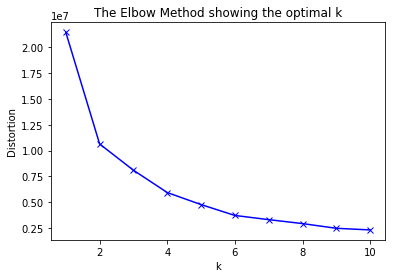

In [38]:
plt.plot(K, distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [39]:
model = KMeans(n_clusters = 2)
model = model.fit(X)
pred = model.predict(X)

In [40]:
silhouette_score(X,pred)

0.6500439383655988

In [41]:
rfm_df = df[['Customers.id', 'Orders.placed_date', 'Orders.order_number', 'Orders.total']]
rfm_df.head()

,Customers.id,Orders.placed_date,Orders.order_number,Orders.total
0,797,1426019099,3758,64.29
1,3,1386090455,23,29.99
2,3,1449603652,9531,78.73
3,4,1386780263,29,29.55
4,5,1386861599,30,46.00


In [42]:
rfm_df['Orders.placed_date'] = pd.to_datetime(rfm_df['Orders.placed_date'], unit = 's')
rfm_df.head()

C:\Users\Kimberly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Customers.id,Orders.placed_date,Orders.order_number,Orders.total
0,797,2015-03-10 20:24:59,3758,64.29
1,3,2013-12-03 17:07:35,23,29.99
2,3,2015-12-08 19:40:52,9531,78.73
3,4,2013-12-11 16:44:23,29,29.55
4,5,2013-12-12 15:19:59,30,46.00


In [43]:
rfm_df['Orders.placed_date'] = rfm_df['Orders.placed_date'].dt.date
rfm_df.head()

C:\Users\Kimberly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Customers.id,Orders.placed_date,Orders.order_number,Orders.total
0,797,2015-03-10,3758,64.29
1,3,2013-12-03,23,29.99
2,3,2015-12-08,9531,78.73
3,4,2013-12-11,29,29.55
4,5,2013-12-12,30,46.00


In [44]:
rfm_df['Orders.placed_date'].max()

datetime.date(2016, 5, 16)

In [68]:
import datetime as dt
now = dt.date(2020, 1, 11)

In [93]:
(now - rfm_df['Orders.placed_date'][0]).days

1768

In [94]:
rfmTable = rfm_df.groupby('Customers.id').agg({'Orders.placed_date': (lambda x: (now - x.max()).days), 
                                               'Orders.order_number': (lambda x: len(x)),
                                              'Orders.total':(lambda x: x.sum())})

In [96]:
rfmTable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054 entries, 3 to 3736
Data columns (total 3 columns):
Orders.placed_date     3054 non-null int64
Orders.order_number    3054 non-null int64
Orders.total           3054 non-null float64
dtypes: float64(1), int64(2)
memory usage: 95.4 KB


In [97]:
rfmTable.head()

,Orders.placed_date,Orders.order_number,Orders.total
Customers.id,,,
3,1495,2,108.72
4,2222,1,29.55
5,1949,3,124.99
7,2206,1,49.14
8,2193,1,69.70


In [100]:
rfmTable.rename(columns = {'Orders.placed_date': 'Recency (days)',
                          'Orders.order_number': 'Frequency',
                          'Orders.total': 'Monetary'})
rfmTable.head()

,Orders.placed_date,Orders.order_number,Orders.total
Customers.id,,,
3,1495,2,108.72
4,2222,1,29.55
5,1949,3,124.99
7,2206,1,49.14
8,2193,1,69.70
